In [1]:
from core.TrajectoryDF import NumPandasTraj as TrajDF
from features.spatial_features import SpatialFeatures as spatial
from features.temporal_features import TemporalFeatures as temporal
import matplotlib.pyplot as plt
from preprocessing.interpolation import Interpolation as ip
from preprocessing.filters import Filters as filt
from utilities.conversions import Conversions as con

import utilities.constants as const
import pandas as pd
from scipy.interpolate import CubicSpline, interp2d
import numpy as np

In [2]:
%%time

# atlantic = pd.read_csv('./data/atlantic.csv')
# atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
# def convert_to_datetime(row):
#         this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
#         this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
#         return '{} {}'.format(this_date, this_time)
# atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)
# sample = TrajDF(atlantic,
#                          latitude='Latitude',
#                          longitude='Longitude',
#                          datetime='DateTime',
#                          traj_id='ID',
#                          rest_of_columns=[])
gulls = pd.read_csv('./data/gulls.csv')
sample = TrajDF(gulls,
                latitude='location-lat',
                longitude='location-long',
                datetime='timestamp',
                traj_id='tag-local-identifier',
                rest_of_columns=[])
# rf = pd.read_csv('./data/geolife_sample.csv')
# sample = TrajDF(rf, 'lat', 'lon', 'datetime', 'id')

CPU times: user 447 ms, sys: 32.2 ms, total: 479 ms
Wall time: 478 ms


In [3]:
%%time

linear = ip.interpolate_position(dataframe=sample.reset_index(),
                                time_jump=3600*4)
print(f"Original DF length: {len(sample)}")
print(f"Linear Original DF length: {len(linear)}")

Original DF length: 89869
Linear Original DF length: 109655
CPU times: user 411 ms, sys: 102 ms, total: 512 ms
Wall time: 2min 6s


In [4]:
%%time

cubic = ip.interpolate_position(dataframe=sample,
                                time_jump=3600*4,
                                ip_type='cubic')
print(f"Original DF length: {len(sample)}")
print(f"Cubic Interpolated DF length: {len(cubic)}")

Original DF length: 89869
Cubic Interpolated DF length: 109655
CPU times: user 365 ms, sys: 110 ms, total: 475 ms
Wall time: 2min 5s


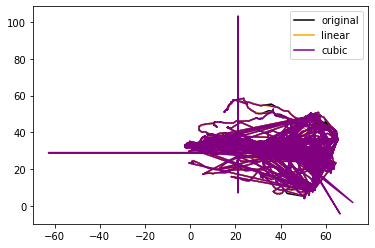

In [5]:
plt.plot(sample[const.LAT],sample[const.LONG], color='black'),
plt.plot(linear[const.LAT], linear[const.LONG], color='orange'),
plt.plot(cubic[const.LAT], cubic[const.LONG], color='purple')

plt.legend(['original', 'linear', 'cubic'])
plt.show()

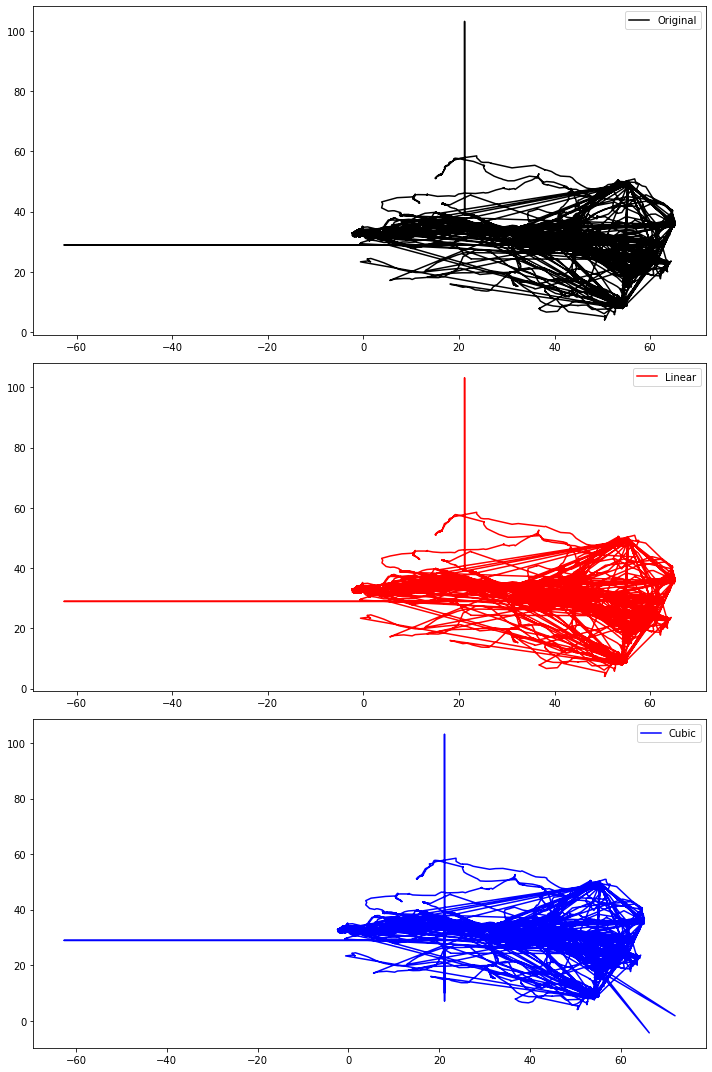

In [6]:
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))


ax1.plot(sample[const.LAT], sample[const.LONG], color='black')
ax1.legend(['Original'])
ax2.plot(linear[const.LAT], linear[const.LONG], color='red')
ax2.legend(['Linear'])
ax3.plot(cubic[const.LAT], cubic[const.LONG], color='blue')
ax3.legend(['Cubic'])
plt.tight_layout()

In [7]:
linear.head()

lat        lon
traj_id DateTime                                 
91732   2009-05-27 14:00:00  61.247830  24.586170
        2009-05-27 18:00:00  61.237723  24.583503
        2009-05-27 20:00:00  61.232670  24.582170
        2009-05-28 00:00:00  61.212963  24.559574
        2009-05-28 05:00:00  61.188330  24.531330

In [8]:
sample.head()

event-id  visible       lon       lat  \
traj_id DateTime                                                       
91732   2009-05-27 14:00:00  1082620685     True  24.58617  61.24783   
        2009-05-27 20:00:00  1082620686     True  24.58217  61.23267   
        2009-05-28 05:00:00  1082620687     True  24.53133  61.18833   
        2009-05-28 08:00:00  1082620688     True  24.58200  61.23283   
        2009-05-28 14:00:00  1082620689     True  24.58250  61.23267   

                            sensor-type individual-taxon-canonical-name  \
traj_id DateTime                                                          
91732   2009-05-27 14:00:00         gps                    Larus fuscus   
        2009-05-27 20:00:00         gps                    Larus fuscus   
        2009-05-28 05:00:00         gps                    Larus fuscus   
        2009-05-28 08:00:00         gps                    Larus fuscus   
        2009-05-28 14:00:00         gps                    Larus fuscus   

                            individual-local-identifier  \
traj_id DateTime                                          
91732   2009-05-27 14:00:00                      91732A   
        2009-05-27 20:00:00                      91732A   
        2009-05-28 05:00:00                      91732A   
        2009-05-28 08:00:00                      91732A   
        2009-05-28 14:00:00                      91732A   

                                                                    study-name  
traj_id DateTime                                                                
91732   2009-05-27 14:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-27 20:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 05:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 08:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 14:00:00  Navigation experiments in lesser black-backed ...